In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import textwrap as txt

In [64]:
def simulation():
    global total ##total number of species in each replicate
    global species #number of species
    species=total 
    for x in range(total):
        if random.randint(0,1)==1:
            species+=1
            ###indvisual divides in 2
        else:
            species-=1
            ##indvisual dies
    total= species

In [65]:
replicates= 1000 ##number of populations
list2=[]  #will contain data for each replicate population
for j in range(replicates):
    list1=[] #contain totals for each generation for one replicate population
    total=1  #population starts with 1 indvisual
    species=1
    list1.append(1)
    for i in range(10000):
        simulation()
        list1.append(species)
    list2.append(list1)

        

In [66]:
df = pd.DataFrame(data=list2)  ##creates data table

In [67]:
total_number_of_indvisuals_list=[]
for i in range(len(list1)):
    total_number_of_indvisuals= sum(df[i])
    total_number_of_indvisuals_list.append(total_number_of_indvisuals)
    
number_of_surviving_populations_list=[]
for j in range(len(list1)):
    number_of_surviving_populations=0
    for i in range(len(list2)):
        if df[j][i]>0:
            number_of_surviving_populations+=1
        else:
            pass
    number_of_surviving_populations_list.append(number_of_surviving_populations)



number_of_surviving_populations_list=pd.Series(data=number_of_surviving_populations_list,name="total_#_of_surviving_populations")
total_number_of_indvisuals_list= pd.Series(data=total_number_of_indvisuals_list, name= "total_number_of_indvisuals")

avg_pop=total_number_of_indvisuals_list/number_of_surviving_populations_list

average_number_of_indvisuals_in_extant_populations=pd.Series(data=avg_pop,name="average_number_of_indvisuals_in_extant_populations")


df3= df.append(number_of_surviving_populations_list, ignore_index= False)
df3=df3.append(total_number_of_indvisuals_list, ignore_index=False)
data_frame=df3.append(average_number_of_indvisuals_in_extant_populations, ignore_index=False)


Text(0, 0.5, 'number of indvisuals')

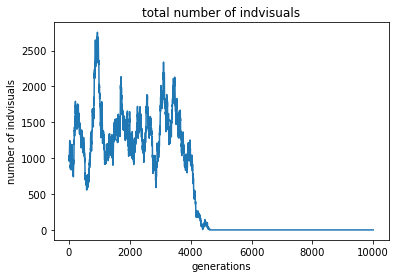

In [68]:
plt.plot(data_frame.loc["total_number_of_indvisuals"])
plt.title("total number of indvisuals")
plt.xlabel('generations')
plt.ylabel('number of indvisuals')


In [69]:
text=txt.fill("The total number of indivisuals seems to flucuate heavily in the begining reaching a peak of around 1300 which is still close to the starting point of 100. Eventually the total number of invisuals goes down to zero as more and more replicate populations become extinct. I've run this simulation multiple times and in few simulation populations do survive, but I predict given enough time all will go extinct")
print(text)



The total number of indivisuals seems to flucuate heavily in the
begining reaching a peak of around 1300 which is still close to the
starting point of 100. Eventually the total number of invisuals goes
down to zero as more and more replicate populations become extinct.
I've run this simulation multiple times and in few simulation
populations do survive, but I predict given enough time all will go
extinct


(0.0, 500.0)

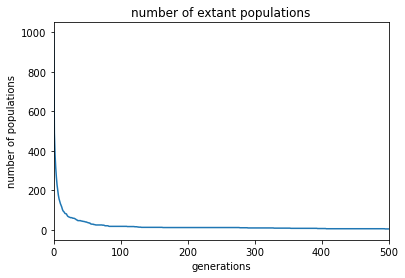

In [70]:
plt.plot(data_frame.loc["total_#_of_surviving_populations"])
plt.title("number of extant populations")
plt.xlabel('generations')
plt.ylabel('number of populations')
plt.xlim([0,500])


In [71]:
text=txt.fill("The number of extant populations quickly decreases as genearations pass. In the first generation only half the populations exist. In the second generation the population size is either 0,2,4 which means theres a high likleyhood of a population getting wipped out. As populations grow larger they become harder to wipe out in one generation, but given enough time all populations will go to zero a few unlicky series of generation can cause a population to rapidly decline.")
print(text)

The number of extant populations quickly decreases as genearations
pass. In the first generation only half the populations exist. In the
second generation the population size is either 0,2,4 which means
theres a high likleyhood of a population getting wipped out. As
populations grow larger they become harder to wipe out in one
generation, but given enough time all populations will go to zero a
few unlicky series of generation can cause a population to rapidly
decline.


Text(0, 0.5, 'number of indvisuals')

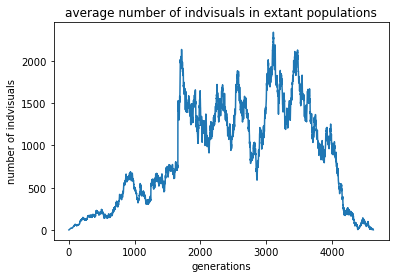

In [75]:
plt.plot(data_frame.loc["average_number_of_indvisuals_in_extant_populations"])
plt.title("average number of indvisuals in extant populations")
plt.xlabel('generations')
plt.ylabel('number of indvisuals')



In [81]:
text=txt.fill("the average number of indvisuals seems to slowly rise in the begining and this makes sense as there as less extant populations but each one is larger. Any of the small population can easily become wiped out in a few generations. The average grows very large is this likley just one or two populations shown neaar generation 2000. Eventually all the populations must die since they will into an unlucky streak of indvisuals failing to reproduce which will drive the average number down in the end.")

print(text)

the average number of indvisuals seems to slowly rise in the begining
and this makes sense as there as less extant populations but each one
is larger. Any of the small population can easily become wiped out in
a few generations. The average grows very large is this likley just
one or two populations shown neaar generation 2000. Eventually all the
populations must die since they will into an unlucky streak of
indvisuals failing to reproduce which will drive the average number
down in the end.


In [77]:
gen_list=[]
for i in range(len(list1)):
    gen_num =f"gen_{i}"
    gen_list.append(gen_num)


replicate_list=[]
for j in range(len(list2)):
    replicate=f"replicate_{j}"
    replicate_list.append(replicate)
    
replicate_list.append("total_#_of_surviving_populations")
replicate_list.append("total_number_of_indvisuals")
replicate_list.append("average_number_of_indvisuals_in_extant_populations")

    
data_frame.columns= [gen_list]
data_frame.index= [replicate_list]

In [78]:
data_frame #nicer looking dataframe

,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,...,gen_9991,gen_9992,gen_9993,gen_9994,gen_9995,gen_9996,gen_9997,gen_9998,gen_9999,gen_10000
replicate_0,1.0,2.0,2.000000,2.000000,4.000000,6.000000,2.00,2.000000,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_1,1.0,2.0,2.000000,2.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_2,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_3,1.0,2.0,4.000000,2.000000,4.000000,2.000000,4.00,6.000000,8.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_4,1.0,2.0,2.000000,4.000000,2.000000,4.000000,2.00,2.000000,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
replicate_998,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
replicate_999,1.0,2.0,2.000000,2.000000,2.000000,4.000000,6.00,8.000000,10.000000,12.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_#_of_surviving_populations,1000.0,492.0,382.000000,316.000000,267.000000,228.000000,200.00,175.000000,157.000000,145.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_number_of_indvisuals,1000.0,984.0,1016.000000,1008.000000,1022.000000,1022.000000,1034.00,986.000000,984.000000,958.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
note=txt.fill("This problem seems like when in gambling when people always double their bet on a 50/50 probability. Given someone starts with finite money and plays an infininte time, they will eventually run out of money. This is like the population simulation as a population can grow very large but also fall very quick;y. The expected value of the one repilcate population I suspect would be 1 if populations could go into the negative but since they can't all the populations go to zero given enough time as once a population reaches zero it will stay at zero.")
print(note)

This problem seems like when in gambling when people always double
their bet on a 50/50 probability. Given someone starts with finite
money and plays an infininte time, they will eventually run out of
money. This is like the population simulation as a population can grow
very large but also fall very quick;y. The expected value of the one
repilcate population I suspect would be 1 if populations could go into
the negative but since they can't all the populations go to zero given
enough time as once a population reaches zero it will stay at zero.
